In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
page_speeds=np.random.normal(3,0.5,3000)

In [3]:
purchase_amount=100-(page_speeds +np.random.normal(0,0.1,3000)*3)

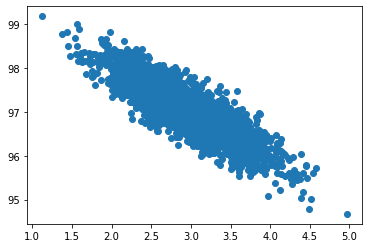

In [4]:
plt.scatter(page_speeds,purchase_amount)

In [5]:
slope,intercept,r_value,p_value,error = stats.linregress(page_speeds,purchase_amount)

In [6]:
r_value**2

0.7337183173188445

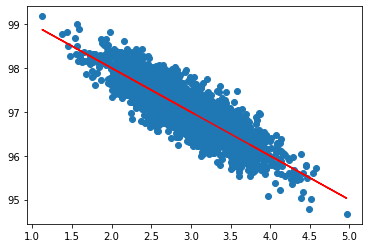

In [7]:
def predict(x):
    return slope*x + intercept

fitline = predict(page_speeds)
plt.scatter(page_speeds,purchase_amount)
plt.plot(page_speeds,fitline,c='r')
plt.show()

### polynomial

In [8]:
np.random.seed(2)

In [9]:
page_speeds=np.random.normal(3,1,1000)

In [10]:
purchase_amount=np.random.normal(50,10,1000)/page_speeds

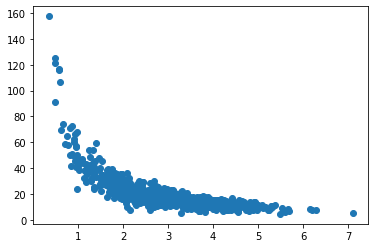

In [11]:
plt.scatter(page_speeds,purchase_amount)
plt.show()

In [12]:
x=np.array(page_speeds)
y=np.array(purchase_amount)

In [13]:
p4=np.poly1d(np.polyfit(x,y,5)) #4 is the degree of the polynomial

In [14]:
xp=np.linspace(0,7,100)

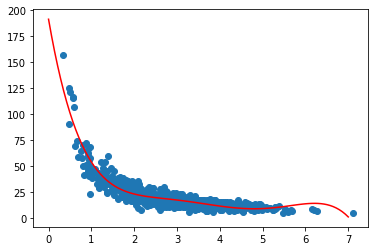

In [15]:
plt.scatter(x,y)
plt.plot(xp,p4(xp),c='r')
plt.show()

In [16]:
from sklearn.metrics import r2_score
r2=r2_score(y,p4(x))
r2

0.8553884386186104

### Multiple Regression

In [17]:
import pandas as pd 
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


<AxesSubplot:xlabel='Mileage'>

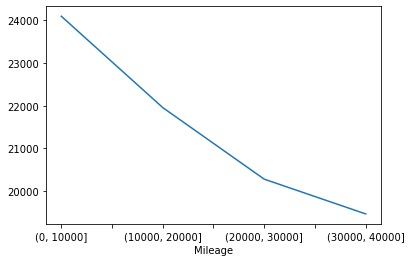

In [18]:
%matplotlib inline
import numpy as np
df1=df[['Mileage','Price']]
bins=np.arange(0,50000,10000)
groups=df1.groupby(pd.cut(df1['Mileage'],bins)).mean()
groups.head()
groups['Price'].plot.line()

In [19]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()

In [20]:
X= df[['Mileage','Cylinder','Doors']]
y = df['Price']
Xtrain = scale.fit_transform((X[['Mileage','Cylinder','Doors']]))
Xtrain=sm.add_constant(Xtrain)
print(Xtrain)

est = sm.OLS(y,Xtrain).fit()
print(est.summary())

[[ 1.         -1.41748516  0.52741047  0.55627894]
 [ 1.         -1.30590228  0.52741047  0.55627894]
 [ 1.         -0.81012759  0.52741047  0.55627894]
 ...
 [ 1.          0.07960546  0.52741047  0.55627894]
 [ 1.          0.75044563  0.52741047  0.55627894]
 [ 1.          1.93256489  0.52741047  0.55627894]]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           3.95e-77
Time:                        17:47:47   Log-Likelihood:                -8356.7
No. Observations:                 804   AIC:                         1.672e+04
Df Residuals:                     800   BIC:                         1.674e+04
Df Model:                           3                   

In [21]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

In [22]:
example = scale.transform([[45000,8,2]])
example = np.insert(example[0],0,1)
example
predict = est.predict(example)
predict

array([30964.38417796])

### K means clustering

In [23]:
from numpy import random, array

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])
    X = array(X)
    return X

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


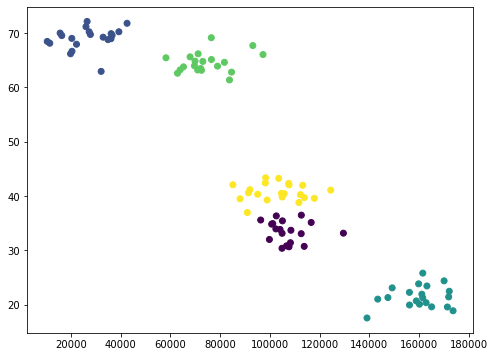

In [24]:
%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

data = createClusteredData(100, 5)

model = KMeans(n_clusters=5)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(data))

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()

### Decision trees

In [25]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree.tree import DecisionTreeClassifier

df = pd.read_csv('C:/Users/Drosxo/PastHires.csv')
df.head()

C:\Users\Drosxo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [26]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
c={'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(c)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [27]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [28]:
y = df["Hired"]
X = df[features]
clf = DecisionTreeClassifier()
clf = clf.fit(X,y)



In [29]:
pip install pydotplus


Note: you may need to restart the kernel to use updated packages.


In [30]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [32]:
from IPython.display import Image  
from six import StringIO
 
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png('d.png'))  

InvocationException: GraphViz's executables not found

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


### XGboost

In [1]:
pip install xgboost

In [20]:
from sklearn.datasets import load_iris
import pandas as pd

In [31]:
iris = load_iris()
dir(iris)
df = pd.DataFrame(iris.data,iris.target)
df['target'] = iris.target
df.head(5)

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
0,4.9,3.0,1.4,0.2,0
0,4.7,3.2,1.3,0.2,0
0,4.6,3.1,1.5,0.2,0
0,5.0,3.6,1.4,0.2,0


In [5]:
num_samples,num_features = iris.data.shape
num_samples,num_features

(150, 4)

In [8]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=0)

In [32]:
import xgboost as xgb

In [33]:
train = xgb.DMatrix(X_train,label=y_train)
test = xgb.DMatrix(X_test,label=y_test)

In [34]:
param = {
    'max_depth' : 4,
    'eta' : 0.3,
    'objective' : 'multi:softmax',
    'num_class' :3}
epochs = 10

In [35]:
model =xgb.train(param,train,epochs)

[11:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
predictions = model.predict(test)

In [37]:
print (predictions)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [38]:
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test,predictions)

In [39]:
acc

1.0

In [41]:
y_predicted= predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

Text(69.0, 0.5, 'Truth')

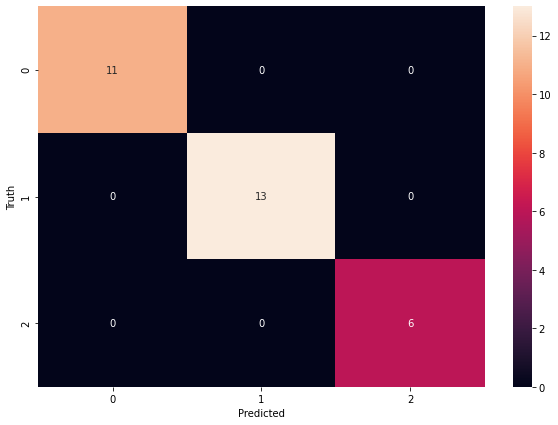

In [43]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### SVC

In [67]:
import numpy as np

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

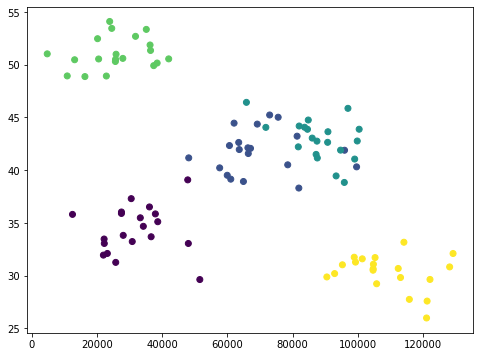

In [68]:
from matplotlib import pyplot as plt
%matplotlib inline


(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()


In [80]:
from sklearn import svm,datasets
C=1
svc = svm.SVC(kernel='poly', degree=3,C=C).fit(X, y)



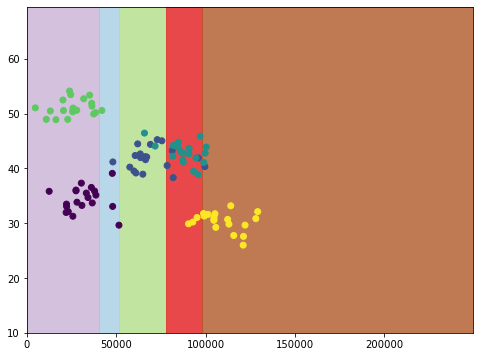

In [81]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 250000, 10),
                     np.arange(10, 70, 0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    
plotPredictions(svc)